<a href="https://colab.research.google.com/github/Ki-i/APRiL/blob/master/q22%E6%9C%880.58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
data_y = pd.read_excel('/content/drive/My Drive/附件3、土壤湿度2022—2012年.xls')

In [7]:
data_y

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92
...,...,...,...,...,...,...,...,...
118,8,2012,115.375,44.125,15.76,44.94,61.25,168.44
119,9,2012,115.375,44.125,17.12,45.67,55.29,168.38
120,10,2012,115.375,44.125,15.04,42.49,54.69,168.33
121,11,2012,115.375,44.125,14.79,42.71,55.02,168.32


In [10]:
data_zfl = pd.read_excel(r'/content/drive/My Drive/附件4、土壤蒸发量2012—2022年.xls')

In [9]:
data_zfl

,月份,年份,经度(lon),纬度(lat),土壤蒸发量(W/m2),土壤蒸发量(mm)
0,1,2022,115.375,44.125,0.41,0.44
1,2,2022,115.375,44.125,0.28,0.27
2,3,2022,115.375,44.125,5.58,5.98
3,1,2021,115.375,44.125,1.05,1.13
4,2,2021,115.375,44.125,1.58,1.53
...,...,...,...,...,...,...
118,8,2012,115.375,44.125,13.32,14.27
119,9,2012,115.375,44.125,12.88,13.36
120,10,2012,115.375,44.125,7.59,8.13
121,11,2012,115.375,44.125,0.88,0.92


In [12]:
data_js12 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2012年.xls')
data_js13 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2013年.xls')
data_js14 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2014年.xls')
data_js15 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2015年.xls')
data_js16 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2016年.xls')
data_js17 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2017年.xls')
data_js18 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2018年.xls')
data_js19 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2019年.xls')
data_js20 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2020年.xls')
data_js21 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2021年.xls')
data_js22 = pd.read_excel(r'/content/drive/My Drive/附件8、锡林郭勒盟气候2012-2022/2022年.xls')

In [13]:
data_js12

,站点号,海拔高度(m),经度,纬度,年份,月份,平均气温(℃),平均最高气温(℃),平均最低气温(℃),最高气温极值(℃),...,平均站点气压(hPa),积雪深度(mm),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots),平均最大瞬时风速(knots),最大瞬时风速极值(knots)
0,54102099999,1004.0,115.375,44.125,2012,1,-22.94,-16.04,-29.35,-9.28,...,907.04,NaN,29.00,26.23,29.93,5.52,8.96,15.5,NaN,NaN
1,54102099999,1004.0,115.375,44.125,2012,2,-17.86,-10.76,-26.25,-0.72,...,903.99,NaN,29.32,26.23,29.93,6.01,11.12,15.5,NaN,NaN
2,54102099999,1004.0,115.375,44.125,2012,3,-7.11,-1.32,-14.78,15.39,...,902.44,NaN,28.28,15.61,29.93,7.36,12.60,27.2,NaN,NaN
3,54102099999,1004.0,115.375,44.125,2012,4,6.94,13.94,-1.94,26.22,...,898.30,NaN,28.21,14.81,29.93,8.82,15.09,25.3,NaN,NaN
4,54102099999,1004.0,115.375,44.125,2012,5,14.61,22.14,4.93,32.50,...,899.50,NaN,28.55,21.57,29.93,8.56,15.54,25.3,NaN,NaN
5,54102099999,1004.0,115.375,44.125,2012,6,17.69,23.12,11.84,31.78,...,895.58,NaN,28.52,20.92,29.93,6.86,12.05,21.4,NaN,NaN
6,54102099999,1004.0,115.375,44.125,2012,7,21.14,26.71,15.43,33.22,...,893.12,NaN,28.20,22.85,29.93,6.91,11.66,21.4,NaN,NaN
7,54102099999,1004.0,115.375,44.125,2012,8,19.87,26.51,12.21,32.50,...,897.44,NaN,29.40,24.94,29.93,6.76,11.53,19.4,NaN,NaN
8,54102099999,1004.0,115.375,44.125,2012,9,12.92,20.31,4.85,28.28,...,902.06,NaN,29.16,20.60,29.93,5.67,9.40,17.5,NaN,NaN
9,54102099999,1004.0,115.375,44.125,2012,10,4.32,11.16,-3.00,20.61,...,901.86,NaN,29.10,14.81,29.93,6.26,10.66,19.4,NaN,NaN


In [14]:
type(data_js12)

pandas.core.frame.DataFrame

In [16]:
month = np.array(data_y['月份'])

In [17]:
month

array([ 1,  2,  3,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12])

In [18]:
sd10cm = np.array(data_y['10cm湿度(kg/m2)'])

In [19]:
sd10cm

array([12.45, 12.1 , 14.96, 15.17, 13.93, 14.37, 14.18, 14.77, 17.66,
       22.1 , 20.36, 21.01, 16.93, 13.91, 13.14, 12.21, 11.86, 11.95,
       13.73, 16.51, 17.01, 21.31, 20.79, 20.04, 16.59, 15.04, 16.51,
       10.27,  9.64, 10.02, 11.22, 15.88, 16.75, 17.25, 17.39, 12.68,
       13.99, 13.89, 12.59, 10.69, 10.26,  9.75, 14.55, 13.94, 15.68,
       19.66, 19.01, 18.27, 14.81, 12.47, 11.08, 12.48, 11.71, 11.1 ,
       11.06, 11.81, 13.29, 15.33, 16.83, 14.24, 13.52, 12.13, 11.21,
       14.11, 13.34, 12.26, 11.05, 15.43, 17.  , 17.33, 12.85, 16.22,
       17.79, 16.33, 13.25, 11.17, 10.77,  9.93, 15.31, 14.55, 16.82,
       17.13, 15.47, 17.31, 15.55, 14.55, 14.73, 10.55,  9.97, 13.96,
       15.5 , 16.73, 18.29, 16.7 , 14.85, 12.84, 14.98, 13.72, 11.73,
       14.09, 13.55, 12.85, 11.82, 12.73, 19.25, 20.34, 17.61, 14.49,
       13.56, 11.92, 10.98, 13.73, 13.  , 12.6 , 11.97, 14.18, 19.28,
       19.64, 15.76, 17.12, 15.04, 14.79, 14.42])

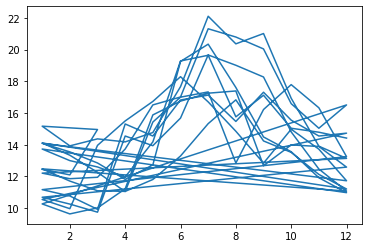

In [20]:
plt.plot(month,sd10cm)

In [21]:
monthno2022=month[3:]

In [22]:
len(monthno2022)

120

In [23]:
sd10cm = sd10cm[3:]

In [24]:
len(sd10cm)

120

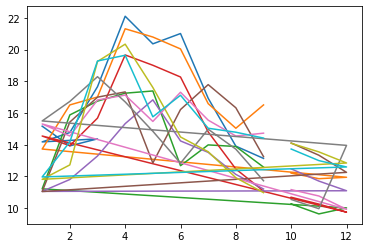

In [25]:
i=0
for i in range(10):
    plt.plot(month[i*12:i*12+12],sd10cm[i*12:i*12+12])

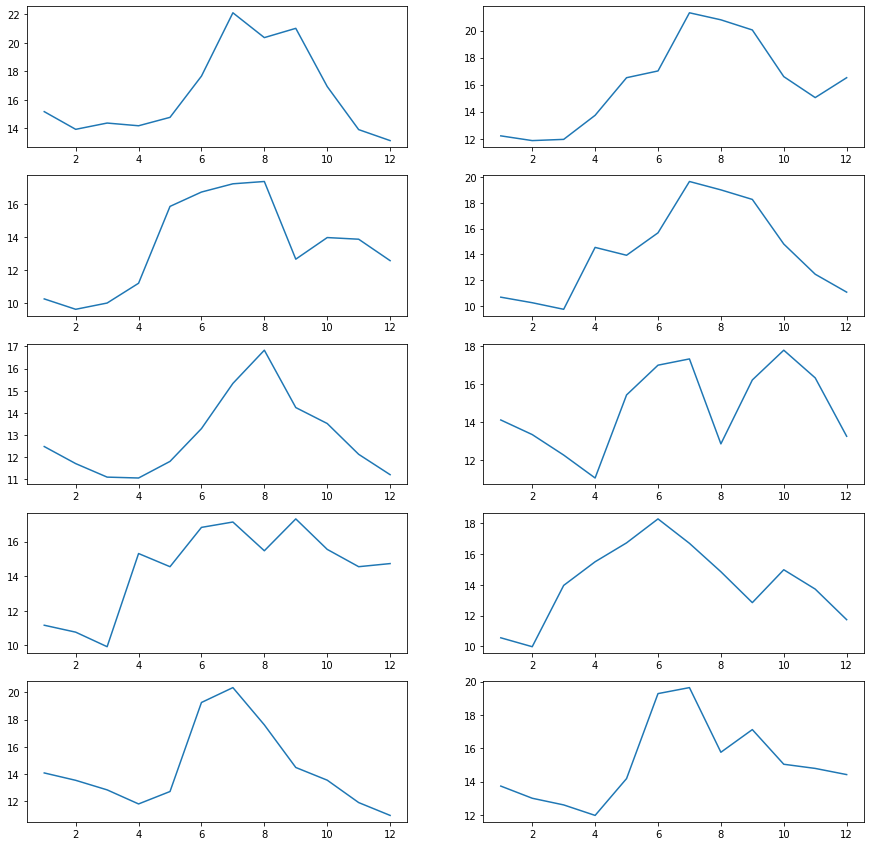

In [26]:
plt.figure(figsize=(15,15))
plt.subplot(5,2,1)
plt.plot(np.arange(12)+1,sd10cm[0:12])
plt.subplot(5,2,2)
plt.plot(np.arange(12)+1,sd10cm[12:24])
plt.subplot(5,2,3)
plt.plot(np.arange(12)+1,sd10cm[24:36])
plt.subplot(5,2,4)
plt.plot(np.arange(12)+1,sd10cm[36:48])
plt.subplot(5,2,5)
plt.plot(np.arange(12)+1,sd10cm[48:60])
plt.subplot(5,2,6)
plt.plot(np.arange(12)+1,sd10cm[60:72])
plt.subplot(5,2,7)
plt.plot(np.arange(12)+1,sd10cm[72:84])
plt.subplot(5,2,8)
plt.plot(np.arange(12)+1,sd10cm[84:96])
plt.subplot(5,2,9)
plt.plot(np.arange(12)+1,sd10cm[96:108])
plt.subplot(5,2,10)
plt.plot(np.arange(12)+1,sd10cm[108:120])

In [27]:
sd40cm = np.array(data_y['40cm湿度(kg/m2)'])
sd100cm = np.array(data_y['100cm湿度(kg/m2)'])
sd200cm = np.array(data_y['200cm湿度(kg/m2)'])

In [28]:
sd40cm = sd40cm[3:]
sd100cm = sd100cm[3:]
sd200cm = sd200cm[3:]

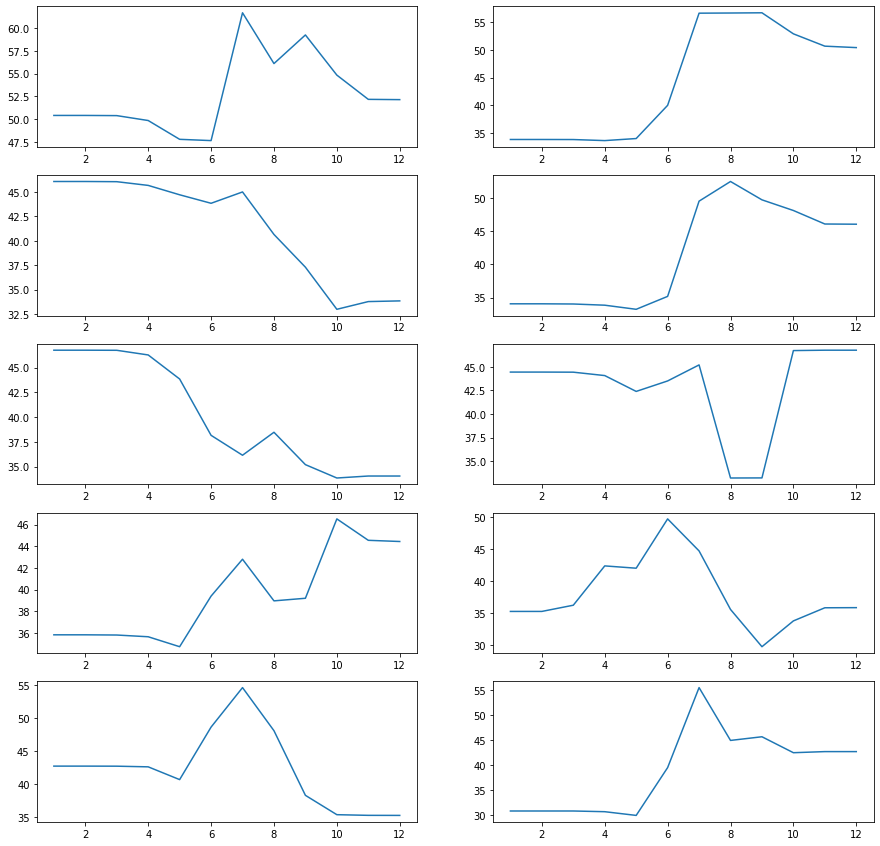

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(5,2,1)
plt.plot(np.arange(12)+1,sd40cm[0:12])
plt.subplot(5,2,2)
plt.plot(np.arange(12)+1,sd40cm[12:24])
plt.subplot(5,2,3)
plt.plot(np.arange(12)+1,sd40cm[24:36])
plt.subplot(5,2,4)
plt.plot(np.arange(12)+1,sd40cm[36:48])
plt.subplot(5,2,5)
plt.plot(np.arange(12)+1,sd40cm[48:60])
plt.subplot(5,2,6)
plt.plot(np.arange(12)+1,sd40cm[60:72])
plt.subplot(5,2,7)
plt.plot(np.arange(12)+1,sd40cm[72:84])
plt.subplot(5,2,8)
plt.plot(np.arange(12)+1,sd40cm[84:96])
plt.subplot(5,2,9)
plt.plot(np.arange(12)+1,sd40cm[96:108])
plt.subplot(5,2,10)
plt.plot(np.arange(12)+1,sd40cm[108:120])

In [30]:
len(sd40cm)

120

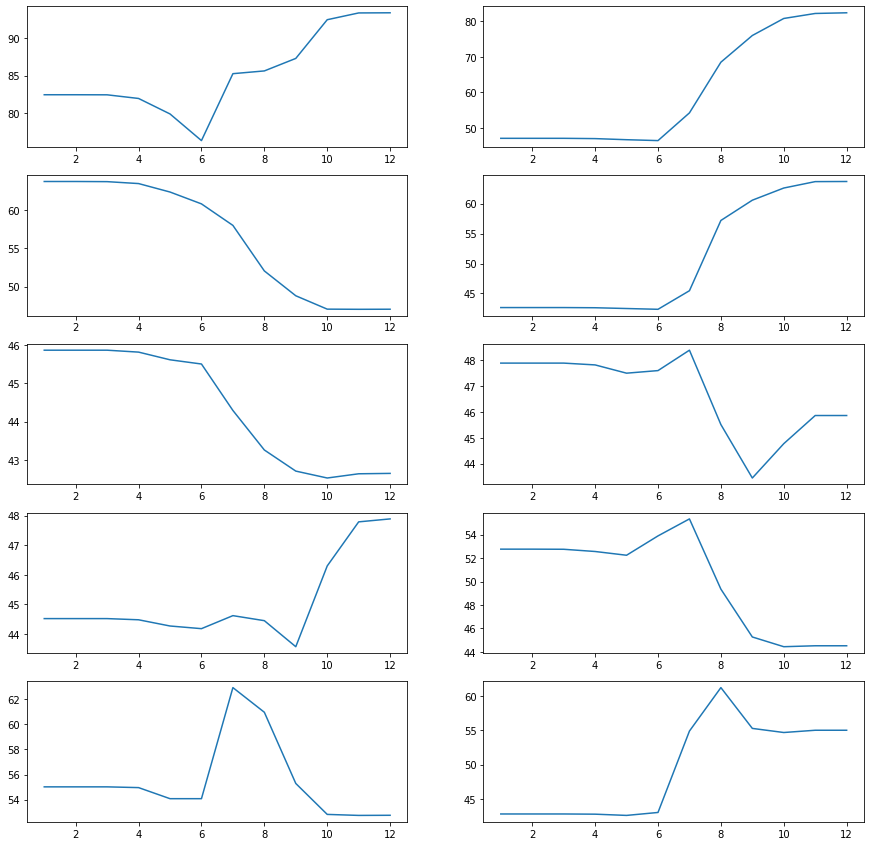

In [31]:
plt.figure(figsize=(15,15))
plt.subplot(5,2,1)
plt.plot(np.arange(12)+1,sd100cm[0:12])
plt.subplot(5,2,2)
plt.plot(np.arange(12)+1,sd100cm[12:24])
plt.subplot(5,2,3)
plt.plot(np.arange(12)+1,sd100cm[24:36])
plt.subplot(5,2,4)
plt.plot(np.arange(12)+1,sd100cm[36:48])
plt.subplot(5,2,5)
plt.plot(np.arange(12)+1,sd100cm[48:60])
plt.subplot(5,2,6)
plt.plot(np.arange(12)+1,sd100cm[60:72])
plt.subplot(5,2,7)
plt.plot(np.arange(12)+1,sd100cm[72:84])
plt.subplot(5,2,8)
plt.plot(np.arange(12)+1,sd100cm[84:96])
plt.subplot(5,2,9)
plt.plot(np.arange(12)+1,sd100cm[96:108])
plt.subplot(5,2,10)
plt.plot(np.arange(12)+1,sd100cm[108:120])

In [32]:
len(sd100cm)

120

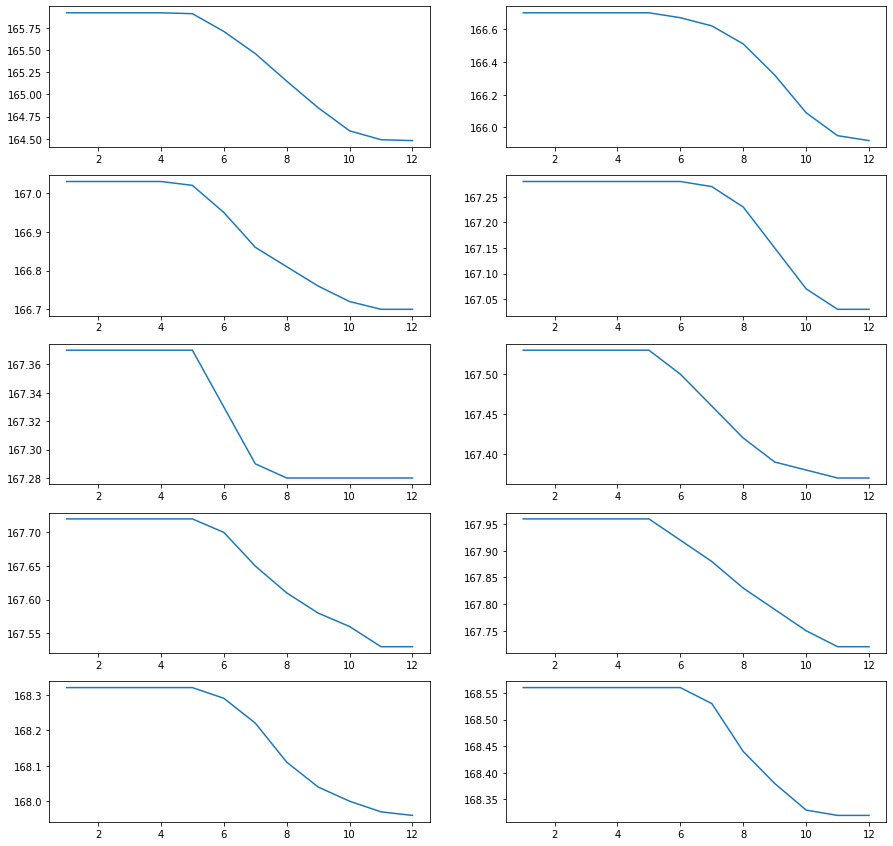

In [33]:
plt.figure(figsize=(15,15))
plt.subplot(5,2,1)
plt.plot(np.arange(12)+1,sd200cm[0:12])
plt.subplot(5,2,2)
plt.plot(np.arange(12)+1,sd200cm[12:24])
plt.subplot(5,2,3)
plt.plot(np.arange(12)+1,sd200cm[24:36])
plt.subplot(5,2,4)
plt.plot(np.arange(12)+1,sd200cm[36:48])
plt.subplot(5,2,5)
plt.plot(np.arange(12)+1,sd200cm[48:60])
plt.subplot(5,2,6)
plt.plot(np.arange(12)+1,sd200cm[60:72])
plt.subplot(5,2,7)
plt.plot(np.arange(12)+1,sd200cm[72:84])
plt.subplot(5,2,8)
plt.plot(np.arange(12)+1,sd200cm[84:96])
plt.subplot(5,2,9)
plt.plot(np.arange(12)+1,sd200cm[96:108])
plt.subplot(5,2,10)
plt.plot(np.arange(12)+1,sd200cm[108:120])

In [41]:
sd10month01=sd10cm[0::12]
sd10month02=sd10cm[1::12]
sd10month03=sd10cm[2::12]
sd10month04=sd10cm[3::12]
sd10month05=sd10cm[4::12]
sd10month06=sd10cm[5::12]
sd10month07=sd10cm[6::12]
sd10month08=sd10cm[7::12]
sd10month09=sd10cm[8::12]
sd10month10=sd10cm[9::12]
sd10month11=sd10cm[10::12]
sd10month12=sd10cm[11::12]

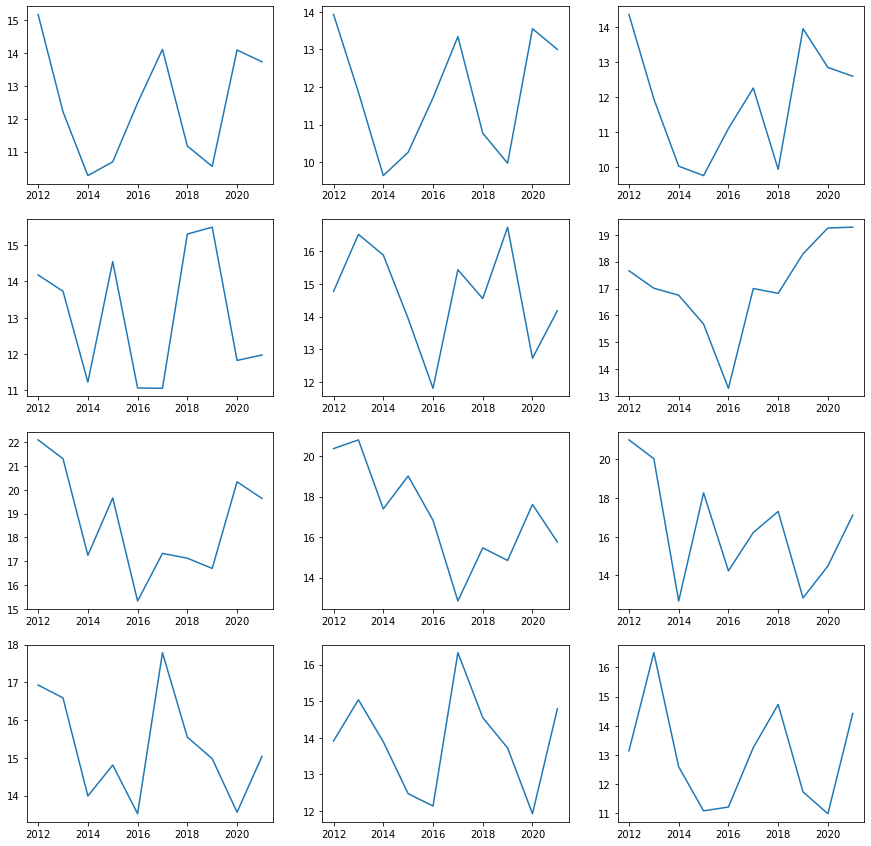

In [42]:
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
plt.plot(np.arange(10)+2012,sd10month01)
plt.subplot(4,3,2)
plt.plot(np.arange(10)+2012,sd10month02)
plt.subplot(4,3,3)
plt.plot(np.arange(10)+2012,sd10month03)
plt.subplot(4,3,4)
plt.plot(np.arange(10)+2012,sd10month04)
plt.subplot(4,3,5)
plt.plot(np.arange(10)+2012,sd10month05)
plt.subplot(4,3,6)
plt.plot(np.arange(10)+2012,sd10month06)
plt.subplot(4,3,7)
plt.plot(np.arange(10)+2012,sd10month07)
plt.subplot(4,3,8)
plt.plot(np.arange(10)+2012,sd10month08)
plt.subplot(4,3,9)
plt.plot(np.arange(10)+2012,sd10month09)
plt.subplot(4,3,10)
plt.plot(np.arange(10)+2012,sd10month10)
plt.subplot(4,3,11)
plt.plot(np.arange(10)+2012,sd10month11)
plt.subplot(4,3,12)
plt.plot(np.arange(10)+2012,sd10month12)

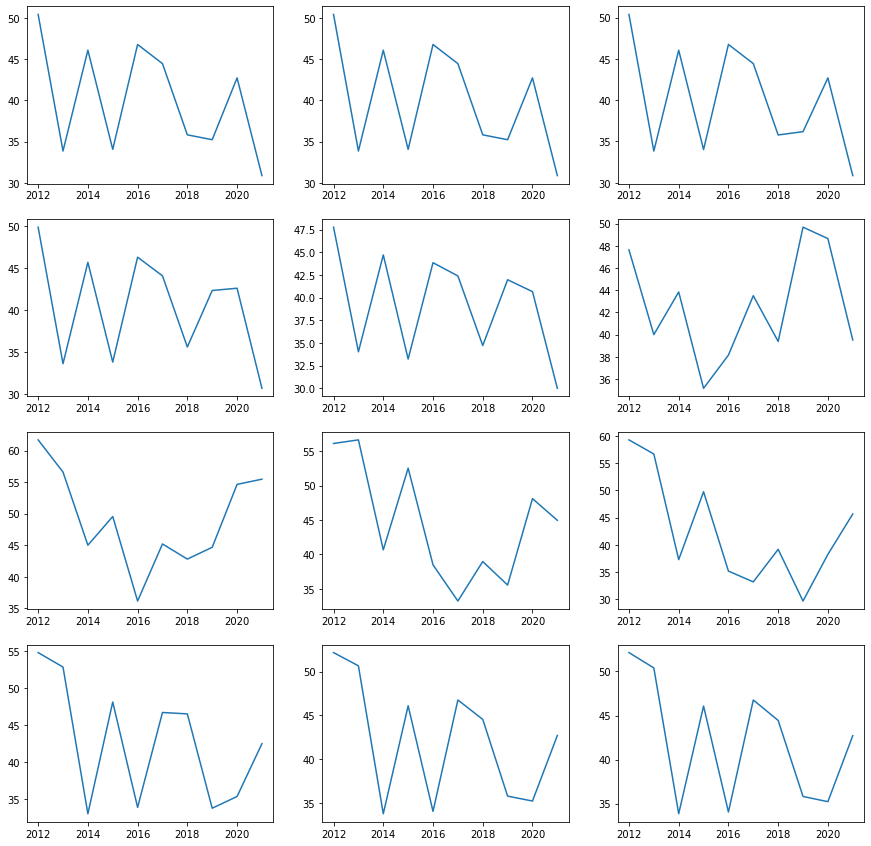

In [44]:
sd40month01=sd40cm[0::12]
sd40month02=sd40cm[1::12]
sd40month03=sd40cm[2::12]
sd40month04=sd40cm[3::12]
sd40month05=sd40cm[4::12]
sd40month06=sd40cm[5::12]
sd40month07=sd40cm[6::12]
sd40month08=sd40cm[7::12]
sd40month09=sd40cm[8::12]
sd40month10=sd40cm[9::12]
sd40month11=sd40cm[10::12]
sd40month12=sd40cm[11::12]
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
plt.plot(np.arange(10)+2012,sd40month01)
plt.subplot(4,3,2)
plt.plot(np.arange(10)+2012,sd40month02)
plt.subplot(4,3,3)
plt.plot(np.arange(10)+2012,sd40month03)
plt.subplot(4,3,4)
plt.plot(np.arange(10)+2012,sd40month04)
plt.subplot(4,3,5)
plt.plot(np.arange(10)+2012,sd40month05)
plt.subplot(4,3,6)
plt.plot(np.arange(10)+2012,sd40month06)
plt.subplot(4,3,7)
plt.plot(np.arange(10)+2012,sd40month07)
plt.subplot(4,3,8)
plt.plot(np.arange(10)+2012,sd40month08)
plt.subplot(4,3,9)
plt.plot(np.arange(10)+2012,sd40month09)
plt.subplot(4,3,10)
plt.plot(np.arange(10)+2012,sd40month10)
plt.subplot(4,3,11)
plt.plot(np.arange(10)+2012,sd40month11)
plt.subplot(4,3,12)
plt.plot(np.arange(10)+2012,sd40month12)

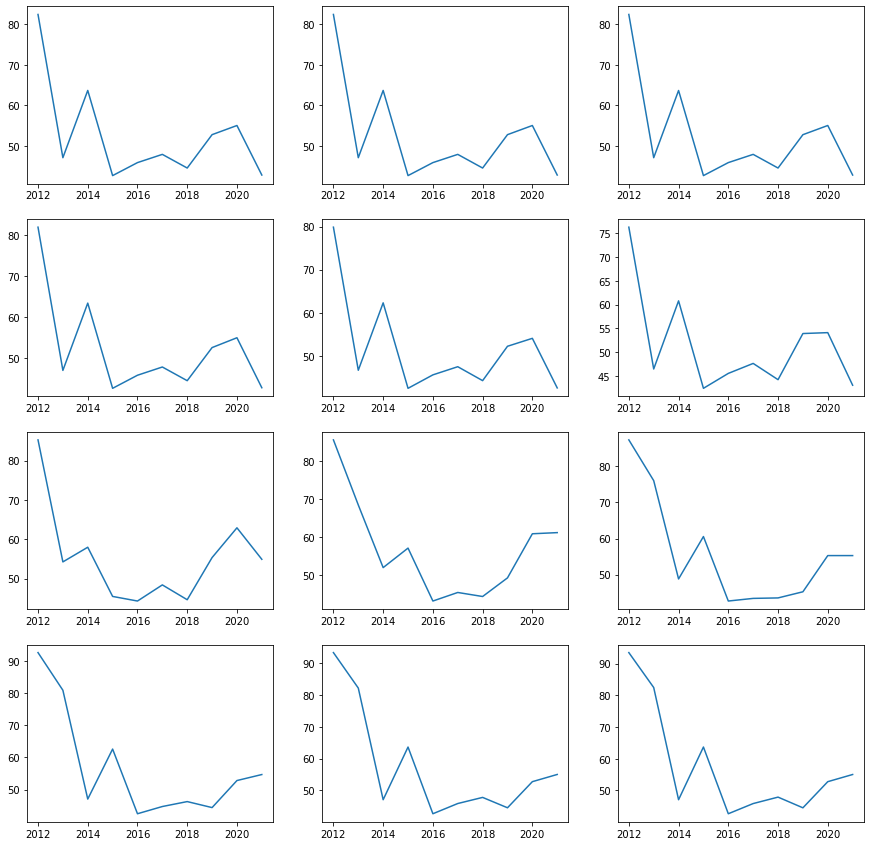

In [45]:
sd100month01=sd100cm[0::12]
sd100month02=sd100cm[1::12]
sd100month03=sd100cm[2::12]
sd100month04=sd100cm[3::12]
sd100month05=sd100cm[4::12]
sd100month06=sd100cm[5::12]
sd100month07=sd100cm[6::12]
sd100month08=sd100cm[7::12]
sd100month09=sd100cm[8::12]
sd100month10=sd100cm[9::12]
sd100month11=sd100cm[10::12]
sd100month12=sd100cm[11::12]
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
plt.plot(np.arange(10)+2012,sd100month01)
plt.subplot(4,3,2)
plt.plot(np.arange(10)+2012,sd100month02)
plt.subplot(4,3,3)
plt.plot(np.arange(10)+2012,sd100month03)
plt.subplot(4,3,4)
plt.plot(np.arange(10)+2012,sd100month04)
plt.subplot(4,3,5)
plt.plot(np.arange(10)+2012,sd100month05)
plt.subplot(4,3,6)
plt.plot(np.arange(10)+2012,sd100month06)
plt.subplot(4,3,7)
plt.plot(np.arange(10)+2012,sd100month07)
plt.subplot(4,3,8)
plt.plot(np.arange(10)+2012,sd100month08)
plt.subplot(4,3,9)
plt.plot(np.arange(10)+2012,sd100month09)
plt.subplot(4,3,10)
plt.plot(np.arange(10)+2012,sd100month10)
plt.subplot(4,3,11)
plt.plot(np.arange(10)+2012,sd100month11)
plt.subplot(4,3,12)
plt.plot(np.arange(10)+2012,sd100month12)

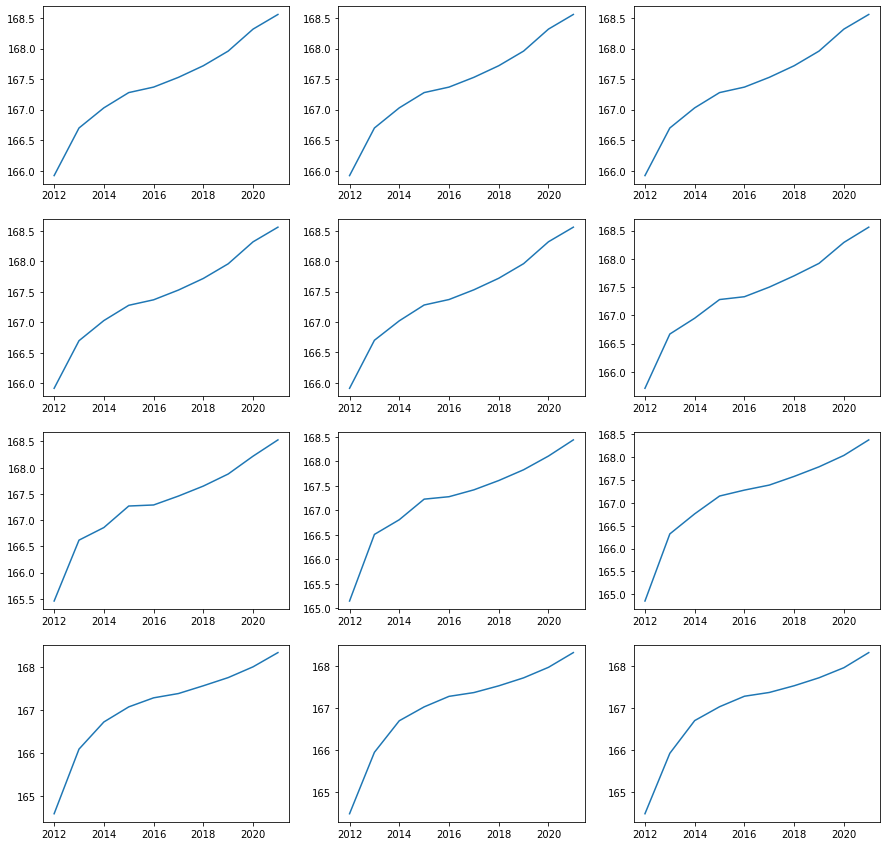

In [46]:
sd200month01=sd200cm[0::12]
sd200month02=sd200cm[1::12]
sd200month03=sd200cm[2::12]
sd200month04=sd200cm[3::12]
sd200month05=sd200cm[4::12]
sd200month06=sd200cm[5::12]
sd200month07=sd200cm[6::12]
sd200month08=sd200cm[7::12]
sd200month09=sd200cm[8::12]
sd200month10=sd200cm[9::12]
sd200month11=sd200cm[10::12]
sd200month12=sd200cm[11::12]
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
plt.plot(np.arange(10)+2012,sd200month01)
plt.subplot(4,3,2)
plt.plot(np.arange(10)+2012,sd200month02)
plt.subplot(4,3,3)
plt.plot(np.arange(10)+2012,sd200month03)
plt.subplot(4,3,4)
plt.plot(np.arange(10)+2012,sd200month04)
plt.subplot(4,3,5)
plt.plot(np.arange(10)+2012,sd200month05)
plt.subplot(4,3,6)
plt.plot(np.arange(10)+2012,sd200month06)
plt.subplot(4,3,7)
plt.plot(np.arange(10)+2012,sd200month07)
plt.subplot(4,3,8)
plt.plot(np.arange(10)+2012,sd200month08)
plt.subplot(4,3,9)
plt.plot(np.arange(10)+2012,sd200month09)
plt.subplot(4,3,10)
plt.plot(np.arange(10)+2012,sd200month10)
plt.subplot(4,3,11)
plt.plot(np.arange(10)+2012,sd200month11)
plt.subplot(4,3,12)
plt.plot(np.arange(10)+2012,sd200month12)

In [47]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   月份              123 non-null    int64  
 1   年份              123 non-null    int64  
 2   经度(lon)         123 non-null    float64
 3   纬度(lat)         123 non-null    float64
 4   10cm湿度(kg/m2)   123 non-null    float64
 5   40cm湿度(kg/m2)   123 non-null    float64
 6   100cm湿度(kg/m2)  123 non-null    float64
 7   200cm湿度(kg/m2)  123 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 7.8 KB


In [48]:
data_rjs12 = data_js12[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs13 = data_js13[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs14 = data_js14[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs15 = data_js15[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs16 = data_js16[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs17 = data_js17[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs18 = data_js18[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs19 = data_js19[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs20 = data_js20[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs21 = data_js21[['降水量(mm)','最大单日降水量(mm)','降水天数']]
data_rjs22 = data_js22.loc[:2,['降水量(mm)','最大单日降水量(mm)','降水天数']]

In [49]:
data_rjs = pd.concat([data_rjs22,data_rjs21,data_rjs20,data_rjs19,data_rjs18,data_rjs17,data_rjs16,data_rjs15,data_rjs14,data_rjs13,data_rjs12])

In [50]:
data_rjs

,降水量(mm),最大单日降水量(mm),降水天数
0,607.31,39.88,29
1,796.04,70.10,21
2,115.57,50.04,9
0,4.57,2.54,6
1,240.03,80.01,9
...,...,...,...
7,62.23,24.89,11
8,62.74,26.92,8
9,16.51,9.91,8
10,30.48,11.94,11


In [51]:
data_rzfl = data_zfl[['土壤蒸发量(W/m2)','土壤蒸发量(mm)']]

In [52]:
data_rzfl

,土壤蒸发量(W/m2),土壤蒸发量(mm)
0,0.41,0.44
1,0.28,0.27
2,5.58,5.98
3,1.05,1.13
4,1.58,1.53
...,...,...
118,13.32,14.27
119,12.88,13.36
120,7.59,8.13
121,0.88,0.92


In [53]:
data_y1 = data_y.drop(["经度(lon)", "纬度(lat)"], axis=1)

In [54]:
data_y1

,月份,年份,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,1,2022,12.45,52.14,93.45,164.48
1,2,2022,12.10,52.14,93.45,164.48
2,3,2022,14.96,52.13,93.44,164.48
3,1,2021,15.17,50.40,82.44,165.92
4,2,2021,13.93,50.40,82.44,165.92
...,...,...,...,...,...,...
118,8,2012,15.76,44.94,61.25,168.44
119,9,2012,17.12,45.67,55.29,168.38
120,10,2012,15.04,42.49,54.69,168.33
121,11,2012,14.79,42.71,55.02,168.32


In [55]:
data_rjs.index = list(range(123))

In [56]:
data_yNew = pd.concat([data_y1,data_rzfl,data_rjs],axis=1)

In [57]:
data_yNew#include data in 2022

,月份,年份,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
0,1,2022,12.45,52.14,93.45,164.48,0.41,0.44,607.31,39.88,29
1,2,2022,12.10,52.14,93.45,164.48,0.28,0.27,796.04,70.10,21
2,3,2022,14.96,52.13,93.44,164.48,5.58,5.98,115.57,50.04,9
3,1,2021,15.17,50.40,82.44,165.92,1.05,1.13,4.57,2.54,6
4,2,2021,13.93,50.40,82.44,165.92,1.58,1.53,240.03,80.01,9
...,...,...,...,...,...,...,...,...,...,...,...
118,8,2012,15.76,44.94,61.25,168.44,13.32,14.27,62.23,24.89,11
119,9,2012,17.12,45.67,55.29,168.38,12.88,13.36,62.74,26.92,8
120,10,2012,15.04,42.49,54.69,168.33,7.59,8.13,16.51,9.91,8
121,11,2012,14.79,42.71,55.02,168.32,0.88,0.92,30.48,11.94,11


In [58]:
data_yNew1 = data_yNew.drop([0,1,2])

In [59]:
data_yNew1

,月份,年份,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
3,1,2021,15.17,50.40,82.44,165.92,1.05,1.13,4.57,2.54,6
4,2,2021,13.93,50.40,82.44,165.92,1.58,1.53,240.03,80.01,9
5,3,2021,14.37,50.38,82.43,165.92,7.00,7.50,118.62,50.04,10
6,4,2021,14.18,49.84,81.94,165.92,10.75,11.14,10.67,2.54,8
7,5,2021,14.77,47.77,79.86,165.91,15.29,16.38,17.78,9.40,7
...,...,...,...,...,...,...,...,...,...,...,...
118,8,2012,15.76,44.94,61.25,168.44,13.32,14.27,62.23,24.89,11
119,9,2012,17.12,45.67,55.29,168.38,12.88,13.36,62.74,26.92,8
120,10,2012,15.04,42.49,54.69,168.33,7.59,8.13,16.51,9.91,8
121,11,2012,14.79,42.71,55.02,168.32,0.88,0.92,30.48,11.94,11


In [60]:
data_yNew1.index=list(range(120))

In [61]:
data_yNew1#not include data in 2022

,月份,年份,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
0,1,2021,15.17,50.40,82.44,165.92,1.05,1.13,4.57,2.54,6
1,2,2021,13.93,50.40,82.44,165.92,1.58,1.53,240.03,80.01,9
2,3,2021,14.37,50.38,82.43,165.92,7.00,7.50,118.62,50.04,10
3,4,2021,14.18,49.84,81.94,165.92,10.75,11.14,10.67,2.54,8
4,5,2021,14.77,47.77,79.86,165.91,15.29,16.38,17.78,9.40,7
...,...,...,...,...,...,...,...,...,...,...,...
115,8,2012,15.76,44.94,61.25,168.44,13.32,14.27,62.23,24.89,11
116,9,2012,17.12,45.67,55.29,168.38,12.88,13.36,62.74,26.92,8
117,10,2012,15.04,42.49,54.69,168.33,7.59,8.13,16.51,9.91,8
118,11,2012,14.79,42.71,55.02,168.32,0.88,0.92,30.48,11.94,11


In [62]:
data_yNew1.loc[(data_yNew1['月份']==1)]

,月份,年份,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
0,1,2021,15.17,50.40,82.44,165.92,1.05,1.13,4.57,2.54,6
12,1,2020,12.21,33.85,47.07,166.70,0.33,0.36,4.06,2.79,3
24,1,2019,10.27,46.07,63.68,167.03,0.74,0.79,0.51,0.51,1
36,1,2018,10.69,34.05,42.65,167.28,0.42,0.45,414.02,39.88,20
48,1,2017,12.48,46.76,45.86,167.37,0.62,0.67,891.79,59.94,26
60,1,2016,14.11,44.44,47.89,167.53,0.59,0.63,4.32,1.27,4
72,1,2015,11.17,35.81,44.52,167.72,0.43,0.46,153.16,59.94,12
84,1,2014,10.55,35.22,52.76,167.96,0.63,0.67,30.73,29.97,2
96,1,2013,14.09,42.71,55.02,168.32,0.37,0.40,3.30,0.76,8
108,1,2012,13.73,30.87,42.79,168.56,0.57,0.61,2.29,0.51,5


In [186]:
data_m01=data_yNew.loc[(data_yNew['月份']==1)]#又感觉没必要删除2022
data_m02=data_yNew.loc[(data_yNew['月份']==2)]
data_m03=data_yNew.loc[(data_yNew['月份']==3)]
data_m04=data_yNew.loc[(data_yNew['月份']==4)]
data_m05=data_yNew.loc[(data_yNew['月份']==5)]
data_m06=data_yNew.loc[(data_yNew['月份']==6)]
data_m07=data_yNew.loc[(data_yNew['月份']==7)]
data_m08=data_yNew.loc[(data_yNew['月份']==8)]
data_m09=data_yNew.loc[(data_yNew['月份']==9)]
data_m10=data_yNew.loc[(data_yNew['月份']==10)]
data_m11=data_yNew.loc[(data_yNew['月份']==11)]
data_m12=data_yNew.loc[(data_yNew['月份']==12)]

In [65]:
data_m01

,月份,年份,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
0,1,2022,12.45,52.14,93.45,164.48,0.41,0.44,607.31,39.88,29
3,1,2021,15.17,50.40,82.44,165.92,1.05,1.13,4.57,2.54,6
15,1,2020,12.21,33.85,47.07,166.70,0.33,0.36,4.06,2.79,3
27,1,2019,10.27,46.07,63.68,167.03,0.74,0.79,0.51,0.51,1
39,1,2018,10.69,34.05,42.65,167.28,0.42,0.45,414.02,39.88,20
51,1,2017,12.48,46.76,45.86,167.37,0.62,0.67,891.79,59.94,26
63,1,2016,14.11,44.44,47.89,167.53,0.59,0.63,4.32,1.27,4
75,1,2015,11.17,35.81,44.52,167.72,0.43,0.46,153.16,59.94,12
87,1,2014,10.55,35.22,52.76,167.96,0.63,0.67,30.73,29.97,2
99,1,2013,14.09,42.71,55.02,168.32,0.37,0.40,3.30,0.76,8


In [187]:
data_m01 = data_m01.drop(["月份"], axis=1)
data_m02 = data_m02.drop(["月份"], axis=1)

In [188]:
data_m01 = pd.DataFrame(data_m01).set_index('年份')
data_m02 = pd.DataFrame(data_m02).set_index('年份')

In [189]:
data_m02

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
年份,,,,,,,,,
2022,12.10,52.14,93.45,164.48,0.28,0.27,796.04,70.10,21
2021,13.93,50.40,82.44,165.92,1.58,1.53,240.03,80.01,9
2020,11.86,33.85,47.07,166.70,0.63,0.63,8.64,3.30,6
2019,9.64,46.07,63.68,167.03,0.33,0.32,184.40,29.97,11
2018,10.26,34.05,42.65,167.28,0.46,0.45,298.70,59.94,18
2017,11.71,46.76,45.86,167.37,1.07,1.04,202.44,39.88,11
2016,13.34,44.44,47.89,167.53,0.94,0.95,9.65,6.10,6
2015,10.77,35.81,44.52,167.72,0.58,0.56,34.80,20.07,9
2014,9.97,35.22,52.76,167.96,0.43,0.42,2.54,0.76,5


In [190]:
data_m01.index = pd.to_datetime(data_m01.index,format='%Y')
data_m02.index = pd.to_datetime(data_m02.index,format='%Y')

In [191]:
data_m02

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
年份,,,,,,,,,
2022-01-01,12.10,52.14,93.45,164.48,0.28,0.27,796.04,70.10,21
2021-01-01,13.93,50.40,82.44,165.92,1.58,1.53,240.03,80.01,9
2020-01-01,11.86,33.85,47.07,166.70,0.63,0.63,8.64,3.30,6
2019-01-01,9.64,46.07,63.68,167.03,0.33,0.32,184.40,29.97,11
2018-01-01,10.26,34.05,42.65,167.28,0.46,0.45,298.70,59.94,18
2017-01-01,11.71,46.76,45.86,167.37,1.07,1.04,202.44,39.88,11
2016-01-01,13.34,44.44,47.89,167.53,0.94,0.95,9.65,6.10,6
2015-01-01,10.77,35.81,44.52,167.72,0.58,0.56,34.80,20.07,9
2014-01-01,9.97,35.22,52.76,167.96,0.43,0.42,2.54,0.76,5


In [71]:
type(data_m01)

pandas.core.frame.DataFrame

In [72]:
type(data_m01['降水量(mm)'])

pandas.core.series.Series

In [192]:
data_m01 = data_m01.iloc[::-1]
data_m02 = data_m02.iloc[::-1]

In [74]:
data_m01

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
年份,,,,,,,,,
2012-01-01,13.73,30.87,42.79,168.56,0.57,0.61,2.29,0.51,5
2013-01-01,14.09,42.71,55.02,168.32,0.37,0.40,3.30,0.76,8
2014-01-01,10.55,35.22,52.76,167.96,0.63,0.67,30.73,29.97,2
2015-01-01,11.17,35.81,44.52,167.72,0.43,0.46,153.16,59.94,12
2016-01-01,14.11,44.44,47.89,167.53,0.59,0.63,4.32,1.27,4
2017-01-01,12.48,46.76,45.86,167.37,0.62,0.67,891.79,59.94,26
2018-01-01,10.69,34.05,42.65,167.28,0.42,0.45,414.02,39.88,20
2019-01-01,10.27,46.07,63.68,167.03,0.74,0.79,0.51,0.51,1
2020-01-01,12.21,33.85,47.07,166.70,0.33,0.36,4.06,2.79,3


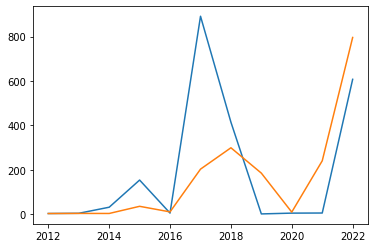

In [193]:
plt.plot(data_m01.index,data_m01['降水量(mm)'])
plt.plot(data_m02.index,data_m02['降水量(mm)'])

In [194]:
class RegLSTM(nn.Module):
    def __init__(self, inp_dim, out_dim, mid_dim, mid_layers):
        super(RegLSTM, self).__init__()

        self.rnn = nn.LSTM(inp_dim, mid_dim, mid_layers)  # rnn
        self.reg = nn.Sequential(
            nn.Linear(mid_dim, mid_dim),
            nn.Tanh(),
            nn.Linear(mid_dim, out_dim),
        )  # regression

    def forward(self, x):
        y = self.rnn(x)[0]  # y, (h, c) = self.rnn(x)     
        seq_len, batch_size, hid_dim = y.shape
        y = y.view(-1, hid_dim)                           
        y = self.reg(y)                                   
        y = y.view(seq_len, batch_size, -1)               
        return y

    """
    PyCharm Crtl+click nn.LSTM() jump to code of PyTorch:
    Examples::
        >>> rnn = nn.LSTM(10, 20, 2)
        >>> input = torch.randn(5, 3, 10)     # 5个时间步，也就是每个时间序列的长度是5,3表示一共有3个时间序列，10表示每个序列在每个时间步的维度是10
        >>> h0 = torch.randn(2, 3, 20)
        >>> c0 = torch.randn(2, 3, 20)
        >>> output, (hn, cn) = rnn(input, (h0, c0))
    """

    def output_y_hc(self, x, hc):

        y, hc = self.rnn(x, hc)  # y, (h, c) = self.rnn(x)

        seq_len, batch_size, hid_dim = y.size()
        y = y.view(-1, hid_dim)
        y = self.reg(y)
        y = y.view(seq_len, batch_size, -1)
        return y, hc


In [ ]:
def minmaxscaler(x):
    minx = np.amin(x)
    maxx = np.amax(x)
    return (x - minx)/(maxx - minx), (minx, maxx)

def preminmaxscaler(x, minx, maxx):
    return (x - minx)/(maxx - minx)

def unminmaxscaler(x, minx, maxx):
    return x * (maxx - minx) + minx


In [ ]:
data_all = np.array(data_m01)
data_x = data_all[:-1, :]
data_y = data_all[+1:, :]

In [ ]:
data_all

array([[1.3730e+01, 3.0870e+01, 4.2790e+01, 1.6856e+02, 5.7000e-01,
        6.1000e-01, 2.2900e+00, 5.1000e-01, 5.0000e+00],
       [1.4090e+01, 4.2710e+01, 5.5020e+01, 1.6832e+02, 3.7000e-01,
        4.0000e-01, 3.3000e+00, 7.6000e-01, 8.0000e+00],
       [1.0550e+01, 3.5220e+01, 5.2760e+01, 1.6796e+02, 6.3000e-01,
        6.7000e-01, 3.0730e+01, 2.9970e+01, 2.0000e+00],
       [1.1170e+01, 3.5810e+01, 4.4520e+01, 1.6772e+02, 4.3000e-01,
        4.6000e-01, 1.5316e+02, 5.9940e+01, 1.2000e+01],
       [1.4110e+01, 4.4440e+01, 4.7890e+01, 1.6753e+02, 5.9000e-01,
        6.3000e-01, 4.3200e+00, 1.2700e+00, 4.0000e+00],
       [1.2480e+01, 4.6760e+01, 4.5860e+01, 1.6737e+02, 6.2000e-01,
        6.7000e-01, 8.9179e+02, 5.9940e+01, 2.6000e+01],
       [1.0690e+01, 3.4050e+01, 4.2650e+01, 1.6728e+02, 4.2000e-01,
        4.5000e-01, 4.1402e+02, 3.9880e+01, 2.0000e+01],
       [1.0270e+01, 4.6070e+01, 6.3680e+01, 1.6703e+02, 7.4000e-01,
        7.9000e-01, 5.1000e-01, 5.1000e-01, 1.0000e+00],


In [ ]:
data_x.shape

(10, 9)

In [ ]:
data_y.shape

(10, 9)

In [ ]:
inp_dim = 9
out_dim = 9
mid_dim = 8
mid_layers = 1

train_size = 8
train_x = data_x[:train_size, :]
train_y = data_y[:train_size, :]


# 预处理数据  归一化
train_x, train_x_minmax = minmaxscaler(train_x)
train_y, train_y_minmax = minmaxscaler(train_y)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 第一种操作，直接把batch_x batch_y这一个序列扔进去
batch_x = train_x[:, np.newaxis, :]
batch_y = train_y[:, np.newaxis, :]
batch_x = torch.tensor(batch_x, dtype=torch.float32, device=device)
batch_y = torch.tensor(batch_y, dtype=torch.float32, device=device)


In [ ]:
# 加载模型
model = RegLSTM(inp_dim, out_dim, mid_dim, mid_layers).to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# 开始训练
print("Training......")
for e in range(801):
    out = model(batch_x)

    Loss = loss(out, batch_y)

    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()

    if e % 10 == 0:
        print('Epoch: {:4}, Loss: {:.5f}'.format(e, Loss.item()))
torch.save(model.state_dict(), './net.pth')
print("Save in:", './net.pth')

Training......
Epoch:    0, Loss: 0.07466
Epoch:   10, Loss: 0.01529
Epoch:   20, Loss: 0.01262
Epoch:   30, Loss: 0.01216
Epoch:   40, Loss: 0.01148
Epoch:   50, Loss: 0.01097
Epoch:   60, Loss: 0.01010
Epoch:   70, Loss: 0.00831
Epoch:   80, Loss: 0.00798
Epoch:   90, Loss: 0.00446
Epoch:  100, Loss: 0.00382
Epoch:  110, Loss: 0.00248
Epoch:  120, Loss: 0.00255
Epoch:  130, Loss: 0.00146
Epoch:  140, Loss: 0.00105
Epoch:  150, Loss: 0.00079
Epoch:  160, Loss: 0.00064
Epoch:  170, Loss: 0.00045
Epoch:  180, Loss: 0.00032
Epoch:  190, Loss: 0.00032
Epoch:  200, Loss: 0.00068
Epoch:  210, Loss: 0.00055
Epoch:  220, Loss: 0.00032
Epoch:  230, Loss: 0.00030
Epoch:  240, Loss: 0.00022
Epoch:  250, Loss: 0.00019
Epoch:  260, Loss: 0.00017
Epoch:  270, Loss: 0.00016
Epoch:  280, Loss: 0.00015
Epoch:  290, Loss: 0.00015
Epoch:  300, Loss: 0.00014
Epoch:  310, Loss: 0.00013
Epoch:  320, Loss: 0.00013
Epoch:  330, Loss: 0.00012
Epoch:  340, Loss: 0.00012
Epoch:  350, Loss: 0.00012
Epoch:  360, 

In [ ]:
new_data_x = data_x.copy()
new_data_x[train_size:] = 0

test_len = 2

eval_size = 1

zero_ten = torch.zeros((mid_layers, eval_size, mid_dim), dtype=torch.float32, device=device)

for i in range(train_size, len(new_data_x)):  # 要预测的是i
    test_x = new_data_x[i-test_len:i, np.newaxis, :]
    test_x = preminmaxscaler(test_x, train_x_minmax[0], train_x_minmax[1])
    batch_test_x = torch.tensor(test_x, dtype=torch.float32, device=device)

    if i == train_size:
        test_y, hc = model.output_y_hc(batch_test_x, (zero_ten, zero_ten))
    else:
        test_y, hc = model.output_y_hc(batch_test_x[-2:], hc)
    test_y = model(batch_test_x)
    #predict_y = test_y[-1].item()
    #predict_y = unminmaxscaler(predict_y, train_x_minmax[0], train_y_minmax[1])
    #new_data_x[i] = predict_y

In [ ]:
data_all

array([[1.3730e+01, 3.0870e+01, 4.2790e+01, 1.6856e+02, 5.7000e-01,
        6.1000e-01, 2.2900e+00, 5.1000e-01, 5.0000e+00],
       [1.4090e+01, 4.2710e+01, 5.5020e+01, 1.6832e+02, 3.7000e-01,
        4.0000e-01, 3.3000e+00, 7.6000e-01, 8.0000e+00],
       [1.0550e+01, 3.5220e+01, 5.2760e+01, 1.6796e+02, 6.3000e-01,
        6.7000e-01, 3.0730e+01, 2.9970e+01, 2.0000e+00],
       [1.1170e+01, 3.5810e+01, 4.4520e+01, 1.6772e+02, 4.3000e-01,
        4.6000e-01, 1.5316e+02, 5.9940e+01, 1.2000e+01],
       [1.4110e+01, 4.4440e+01, 4.7890e+01, 1.6753e+02, 5.9000e-01,
        6.3000e-01, 4.3200e+00, 1.2700e+00, 4.0000e+00],
       [1.2480e+01, 4.6760e+01, 4.5860e+01, 1.6737e+02, 6.2000e-01,
        6.7000e-01, 8.9179e+02, 5.9940e+01, 2.6000e+01],
       [1.0690e+01, 3.4050e+01, 4.2650e+01, 1.6728e+02, 4.2000e-01,
        4.5000e-01, 4.1402e+02, 3.9880e+01, 2.0000e+01],
       [1.0270e+01, 4.6070e+01, 6.3680e+01, 1.6703e+02, 7.4000e-01,
        7.9000e-01, 5.1000e-01, 5.1000e-01, 1.0000e+00],


In [ ]:
data_train = data_all[:9,:]
data_train

array([[1.3730e+01, 3.0870e+01, 4.2790e+01, 1.6856e+02, 5.7000e-01,
        6.1000e-01, 2.2900e+00, 5.1000e-01, 5.0000e+00],
       [1.4090e+01, 4.2710e+01, 5.5020e+01, 1.6832e+02, 3.7000e-01,
        4.0000e-01, 3.3000e+00, 7.6000e-01, 8.0000e+00],
       [1.0550e+01, 3.5220e+01, 5.2760e+01, 1.6796e+02, 6.3000e-01,
        6.7000e-01, 3.0730e+01, 2.9970e+01, 2.0000e+00],
       [1.1170e+01, 3.5810e+01, 4.4520e+01, 1.6772e+02, 4.3000e-01,
        4.6000e-01, 1.5316e+02, 5.9940e+01, 1.2000e+01],
       [1.4110e+01, 4.4440e+01, 4.7890e+01, 1.6753e+02, 5.9000e-01,
        6.3000e-01, 4.3200e+00, 1.2700e+00, 4.0000e+00],
       [1.2480e+01, 4.6760e+01, 4.5860e+01, 1.6737e+02, 6.2000e-01,
        6.7000e-01, 8.9179e+02, 5.9940e+01, 2.6000e+01],
       [1.0690e+01, 3.4050e+01, 4.2650e+01, 1.6728e+02, 4.2000e-01,
        4.5000e-01, 4.1402e+02, 3.9880e+01, 2.0000e+01],
       [1.0270e+01, 4.6070e+01, 6.3680e+01, 1.6703e+02, 7.4000e-01,
        7.9000e-01, 5.1000e-01, 5.1000e-01, 1.0000e+00],


In [ ]:
data_test = data_all[9:,:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(data_train)
df_for_testing_scaled=scaler.transform(data_test)
df_for_training_scaled

array([[0.90104167, 0.        , 0.00665716, 1.        , 0.58536585,
        0.58139535, 0.00199713, 0.        , 0.16      ],
       [0.99479167, 0.74512272, 0.58820732, 0.87096774, 0.09756098,
        0.09302326, 0.00313033, 0.00420663, 0.28      ],
       [0.07291667, 0.27375708, 0.4807418 , 0.67741935, 0.73170732,
        0.72093023, 0.03390629, 0.49570924, 0.04      ],
       [0.234375  , 0.31088735, 0.08892059, 0.5483871 , 0.24390244,
        0.23255814, 0.17127053, 1.        , 0.44      ],
       [1.        , 0.85399622, 0.24916786, 0.44623656, 0.63414634,
        0.62790698, 0.00427475, 0.01278815, 0.12      ],
       [0.57552083, 1.        , 0.15263909, 0.36021505, 0.70731707,
        0.72093023, 1.        , 1.        , 1.        ],
       [0.109375  , 0.20012587, 0.        , 0.31182796, 0.2195122 ,
        0.20930233, 0.46395072, 0.66246004, 0.76      ],
       [0.        , 0.95657646, 1.        , 0.17741935, 1.        ,
        1.        , 0.        , 0.        , 0.        ],


In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=createXY(df_for_training_scaled,1)
testX,testY=createXY(df_for_testing_scaled,1)

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)


trainX Shape--  (8, 1, 9)
trainY Shape--  (8,)
testX Shape--  (1, 1, 9)
testY Shape--  (1,)


In [ ]:
df_for_testing_scaled

array([[ 1.27604167,  1.22907489,  1.89205896, -0.41935484,  1.75609756,
         1.79069767,  0.00455525,  0.03415783,  0.2       ],
       [ 0.56770833,  1.33857772,  2.41559677, -1.19354839,  0.19512195,
         0.18604651,  0.6808186 ,  0.66246004,  1.12      ]])

SyntaxError: ignored

# tommy

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils, losses
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

import warnings
warnings.filterwarnings('ignore')

In [79]:
data_m01

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
年份,,,,,,,,,
2012-01-01,13.73,30.87,42.79,168.56,0.57,0.61,2.29,0.51,5
2013-01-01,14.09,42.71,55.02,168.32,0.37,0.40,3.30,0.76,8
2014-01-01,10.55,35.22,52.76,167.96,0.63,0.67,30.73,29.97,2
2015-01-01,11.17,35.81,44.52,167.72,0.43,0.46,153.16,59.94,12
2016-01-01,14.11,44.44,47.89,167.53,0.59,0.63,4.32,1.27,4
2017-01-01,12.48,46.76,45.86,167.37,0.62,0.67,891.79,59.94,26
2018-01-01,10.69,34.05,42.65,167.28,0.42,0.45,414.02,39.88,20
2019-01-01,10.27,46.07,63.68,167.03,0.74,0.79,0.51,0.51,1
2020-01-01,12.21,33.85,47.07,166.70,0.33,0.36,4.06,2.79,3


In [211]:
for col in list(data_m01.columns):
    scaler = MinMaxScaler()
    data_m01[col] = scaler.fit_transform(data_m01[col].values.reshape(-1,1))
for col in list(data_m02.columns):
    scaler = MinMaxScaler()
    data_m02[col] = scaler.fit_transform(data_m02[col].values.reshape(-1,1))

In [213]:
data_m02

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),土壤蒸发量(W/m2),土壤蒸发量(mm),降水量(mm),最大单日降水量(mm),降水天数
年份,,,,,,,,,
2012-01-01,0.783217,0.000000,0.002756,1.000000,0.446154,0.468254,0.000000,0.000000,0.058824
2013-01-01,0.911422,0.556653,0.243504,0.941176,0.407692,0.404762,0.000630,0.012871,0.000000
2014-01-01,0.076923,0.204513,0.199016,0.852941,0.115385,0.119048,0.000315,0.000000,0.058824
2015-01-01,0.263403,0.232252,0.036811,0.794118,0.230769,0.230159,0.040957,0.243659,0.294118
2016-01-01,0.862471,0.637988,0.103150,0.747549,0.507692,0.539683,0.009272,0.067382,0.117647
2017-01-01,0.482517,0.747062,0.063189,0.708333,0.607692,0.611111,0.252157,0.493628,0.411765
2018-01-01,0.144522,0.149506,0.000000,0.686275,0.138462,0.142857,0.373430,0.746751,0.823529
2019-01-01,0.000000,0.714622,0.413976,0.625000,0.038462,0.039683,0.229430,0.368580,0.411765
2020-01-01,0.517483,0.140103,0.087008,0.544118,0.269231,0.285714,0.008000,0.032050,0.117647


In [214]:
# 特征数据集

# X = data_m01.drop(columns=['10cm湿度(kg/m2)'], axis=1) 
X = data_m02

# 标签数据集

y = data_m02['10cm湿度(kg/m2)']

In [215]:
# 2 构造特征数据集

def create_dataset(X, y, seq_len=2):
    features = []
    targets = []
    
    for i in range(0, len(X) - seq_len, 1):
        data = X.iloc[i:i+seq_len] # 序列数据
        label = y.iloc[i+seq_len] # 标签数据
        # 保存到features和labels
        features.append(data)
        targets.append(label)
    
    # 返回
    return np.array(features), np.array(targets)

In [216]:
data1,label1 = create_dataset(X, y, seq_len=2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=666)

In [217]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(data1, label1, test_size=0.2, shuffle=False, random_state=666)

In [218]:
# 3 构造批数据

def create_batch_dataset(X, y, train=True, buffer_size=1000, batch_size=128):
    batch_data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # 数据封装，tensor类型
    if train: # 训练集
        return batch_data.cache().shuffle(buffer_size).batch(batch_size)
    else: # 测试集
        return batch_data.batch(batch_size)

In [219]:
# 训练批数据

train_batch_dataset = create_batch_dataset(train_dataset, train_labels)

In [220]:
# 测试批数据

test_batch_dataset = create_batch_dataset(test_dataset, test_labels, train=False)

In [221]:
# 从测试批数据中，获取一个batch_size的样本数据

list(test_batch_dataset.as_numpy_iterator())[0]

(array([[[0.        , 0.71462153, 0.41397638, 0.625     , 0.03846154,
          0.03968254, 0.22942992, 0.36858044, 0.41176471],
         [0.51748252, 0.14010343, 0.08700787, 0.54411765, 0.26923077,
          0.28571429, 0.008     , 0.03205047, 0.11764706]],
 
        [[0.51748252, 0.14010343, 0.08700787, 0.54411765, 0.26923077,
          0.28571429, 0.008     , 0.03205047, 0.11764706],
         [1.        , 0.91819464, 0.78326772, 0.35294118, 1.        ,
          1.        , 0.29951496, 1.        , 0.29411765]]]),
 array([1.        , 0.57342657]))

In [236]:
# 模型搭建--版本1

model = Sequential([
    layers.LSTM(units=256, input_shape=train_dataset.shape[-2:], return_sequences=True),
    #layers.Dropout(0.4),
     layers.LSTM(units=256, return_sequences=True),
     layers.LSTM(units=256, return_sequences=True),
     layers.LSTM(units=256, return_sequences=True),
     layers.LSTM(units=256, return_sequences=True),
     layers.LSTM(units=256, return_sequences=True),
    #  layers.LSTM(units=256, return_sequences=True),
    #  layers.LSTM(units=256, return_sequences=True),
     #layers.Dropout(0.2),
     layers.LSTM(units=256, return_sequences=True),
     
     #layers.Dropout(0.3),
     layers.LSTM(units=128, return_sequences=True),
     layers.LSTM(units=32),
    layers.Dense(1)
])

In [237]:
# 保存模型权重文件和训练日志



log_file='logs'

tensorboard_callback = TensorBoard(log_file)

In [238]:
# 模型编译

model.compile(optimizer='adam',
              loss='mse')

In [239]:
checkpoint_file = "best_model.hdf5"

checkpoint_callback = ModelCheckpoint(filepath=checkpoint_file, 
                                      monitor='loss',
                                      mode='min',
                                      save_best_only=True,
                                      save_weights_only=True)

In [240]:
# 模型训练

history = model.fit(train_batch_dataset,
                    epochs=200,
                    validation_data=test_batch_dataset,
                    callbacks=[tensorboard_callback, checkpoint_callback])

Epoch 1/200
1/1 [==============================] - 38s 38s/step - loss: 0.1915 - val_loss: 0.6539
Epoch 2/200
1/1 [==============================] - 0s 176ms/step - loss: 0.1871 - val_loss: 0.6427
Epoch 3/200
1/1 [==============================] - 0s 159ms/step - loss: 0.1824 - val_loss: 0.6303
Epoch 4/200
1/1 [==============================] - 0s 155ms/step - loss: 0.1773 - val_loss: 0.6164
Epoch 5/200
1/1 [==============================] - 0s 158ms/step - loss: 0.1716 - val_loss: 0.6007
Epoch 6/200
1/1 [==============================] - 0s 166ms/step - loss: 0.1654 - val_loss: 0.5827
Epoch 7/200
1/1 [==============================] - 0s 204ms/step - loss: 0.1584 - val_loss: 0.5619
Epoch 8/200
1/1 [==============================] - 0s 153ms/step - loss: 0.1505 - val_loss: 0.5374
Epoch 9/200
1/1 [==============================] - 0s 159ms/step - loss: 0.1416 - val_loss: 0.5085
Epoch 10/200
1/1 [==============================] - 0s 158ms/step - loss: 0.1315 - val_loss: 0.4741
Epoch 11/2

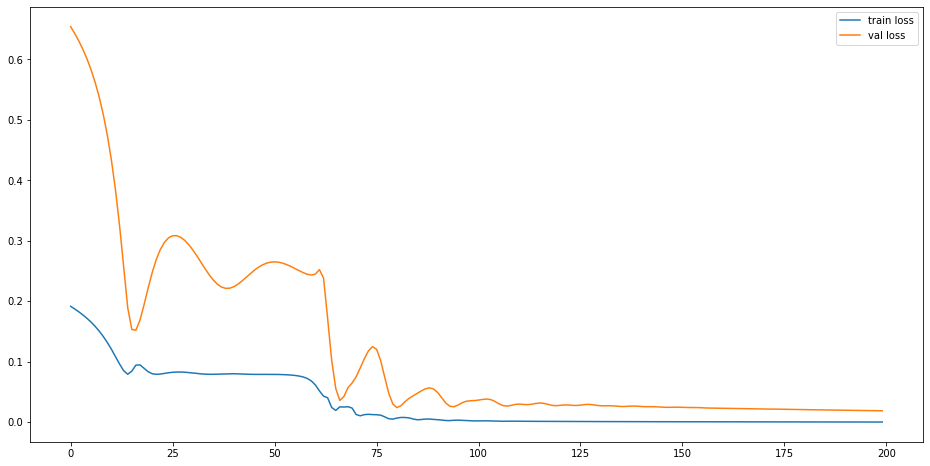

In [241]:
# 显示训练结果

plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(loc='best')
plt.show()

In [242]:
test_preds = model.predict(test_dataset, verbose=1)

1/1 [==============================] - 4s 4s/step


In [243]:
# 计算r2值

score = r2_score(test_labels, test_preds)

print("r^2 值为： ", score)

r^2 值为：  0.5885907967048161


In [ ]:
model.save('/content/drive/My Drive/r=0.72_model.h5')

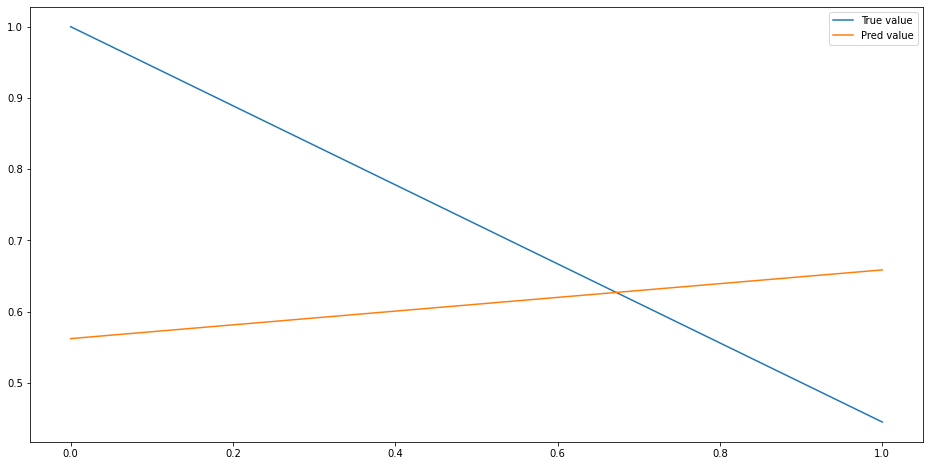

In [ ]:
# 绘制 预测与真值结果

plt.figure(figsize=(16,8))
plt.plot(test_labels, label="True value")
plt.plot(test_preds, label="Pred value")
plt.legend(loc='best')
plt.show()